<a href="https://colab.research.google.com/github/DIPANJAN001/Dipanjanpatra/blob/master/fianl_for_3rdsem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
weather_data=pd.read_excel("/content/pv_02.xlsx") 

In [10]:
weather_input1=weather_data.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
weather_input.head()
solpow=weather_data['power_normed']
solpow

0       0.000000
1       0.000000
2       0.000000
3       0.014560
4       0.152064
          ...   
6273    0.110155
6274    0.254311
6275    0.003055
6276    0.000000
6277    0.000000
Name: power_normed, Length: 6278, dtype: float64

### MLP

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(weather_input,solpow, test_size=0.33, random_state=42,shuffle=False)

Feature selection

In [12]:
!pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 4.9 MB/s 


In [13]:
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
import numpy as np


In [14]:
rf_all_features = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=5)
rf_all_features.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=1000, random_state=1)

In [15]:
rfc = RandomForestRegressor(random_state=1, n_estimators=100, max_depth=3)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	13
Rejected: 	31
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	13
Rejected: 	31
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	13
Rejected: 	31
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	13
Rejected: 	31
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	9
Rejected: 	33
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	9
Rejected: 	33
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	9
Rejected: 	33
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	9
Rejected: 	33
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	8
Rejected: 	

BorutaPy(estimator=RandomForestRegressor(max_depth=3, n_estimators=182,
                                         random_state=RandomState(MT19937) at 0x7F4B923DD050),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F4B923DD050, verbose=2)

In [16]:
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
0,hour_of_day,1
18,clearsky_global_agg,1
19,Albedo,1
20,WindComponentUat0,1
10,sunposition_solarAzimuth,1
17,clearsky_direct_agg,1
29,RelativeHumidityAt950,1
28,RelativeHumidityAt1000,1
34,SurfacePressureAt0,1
35,SolarRadiationGlobalAt0,1


In [17]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [18]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model

In [19]:
n_inputs=X_important_train.shape[1]

In [20]:
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
#n_bottleneck = round(float(n_inputs) / 2.0)
n_bottleneck = 5
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [21]:
# output layer
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [22]:
history = model.fit(X_important_train, X_important_train, epochs=50, batch_size=16, verbose=2)

Epoch 1/50
263/263 - 5s - loss: 0.1438 - 5s/epoch - 18ms/step
Epoch 2/50
263/263 - 1s - loss: 0.0194 - 1s/epoch - 4ms/step
Epoch 3/50
263/263 - 1s - loss: 0.0157 - 1s/epoch - 4ms/step
Epoch 4/50
263/263 - 1s - loss: 0.0131 - 1s/epoch - 4ms/step
Epoch 5/50
263/263 - 1s - loss: 0.0128 - 1s/epoch - 4ms/step
Epoch 6/50
263/263 - 1s - loss: 0.0115 - 1s/epoch - 4ms/step
Epoch 7/50
263/263 - 1s - loss: 0.0107 - 1s/epoch - 4ms/step
Epoch 8/50
263/263 - 1s - loss: 0.0111 - 1s/epoch - 4ms/step
Epoch 9/50
263/263 - 1s - loss: 0.0095 - 1s/epoch - 4ms/step
Epoch 10/50
263/263 - 1s - loss: 0.0096 - 1s/epoch - 4ms/step
Epoch 11/50
263/263 - 1s - loss: 0.0089 - 1s/epoch - 4ms/step
Epoch 12/50
263/263 - 1s - loss: 0.0087 - 1s/epoch - 4ms/step
Epoch 13/50
263/263 - 1s - loss: 0.0082 - 1s/epoch - 4ms/step
Epoch 14/50
263/263 - 1s - loss: 0.0078 - 1s/epoch - 4ms/step
Epoch 15/50
263/263 - 1s - loss: 0.0079 - 1s/epoch - 4ms/step
Epoch 16/50
263/263 - 1s - loss: 0.0074 - 1s/epoch - 4ms/step
Epoch 17/50
263/

In [23]:
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder.h5')

In [24]:
encoder = load_model('encoder.h5')

# encode the train data
X_train_final = encoder.predict(X_important_train)
# encode the test data
X_test_final = encoder.predict(X_important_test)

In [25]:
X_train_final.shape

(4206, 5)

In [26]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
def create_model():
      model = Sequential()
      model.add(Dense(8, kernel_initializer='normal',input_dim =X_train_final.shape[1], activation='relu'))


      model.add(Dense(32, kernel_initializer='normal',activation='relu'))
      model.add(Dense(64, kernel_initializer='normal',activation='relu'))
      model.add(Dense(16, kernel_initializer='normal',activation='relu'))

      model.add(Dense(1, kernel_initializer='normal',activation='linear'))


      model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
      return model
#MLP_model.summary()

In [5]:
seed = 7
numpy.random.seed(seed)

In [6]:
model = KerasRegressor(build_fn=create_model, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [7]:
batch_size = [16,32,64]
epochs = [80,100,120]

In [8]:
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_final, y_train)

NameError: ignored

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
def create_model( optimizer='adam'):
      model = Sequential()
      model.add(Dense(8, kernel_initializer='normal',input_dim =X_train_final.shape[1], activation='relu'))


      model.add(Dense(32, kernel_initializer='normal',activation='relu'))
      model.add(Dense(64, kernel_initializer='normal',activation='relu'))
      model.add(Dense(16, kernel_initializer='normal',activation='relu'))

      model.add(Dense(1, kernel_initializer='normal',activation='linear'))


      model.compile(loss='mean_absolute_error',optimizer=optimizer, metrics=['mean_squared_error'])
      return model

In [ ]:
seed = 7
numpy.random.seed(seed)

In [ ]:
model = KerasRegressor(build_fn=create_model, epochs=120, batch_size=64, verbose=0)

In [ ]:
optimizer = ['SGD', 'Adagrad', 'Adam']

In [ ]:
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_final, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
def create_model(init_mode='uniform'):
      model = Sequential()
      model.add(Dense(8, kernel_initializer=init_mode,input_dim =X_train_final.shape[1], activation='relu'))


      model.add(Dense(32, kernel_initializer=init_mode,activation='relu'))
      model.add(Dense(64, kernel_initializer=init_mode,activation='relu'))
      model.add(Dense(16, kernel_initializer=init_mode,activation='relu'))

      model.add(Dense(1, kernel_initializer=init_mode,activation='linear'))


      model.compile(loss='mean_absolute_error',optimizer='adam', metrics=['mean_squared_error'])
      return model

In [ ]:
seed = 7
numpy.random.seed(seed)

In [ ]:
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

In [ ]:
model = KerasRegressor(build_fn=create_model, epochs=120, batch_size=64, verbose=0)

In [ ]:
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_final, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


In [ ]:
def create_model(activation='relu'):
      model = Sequential()
      model.add(Dense(8, kernel_initializer='uniform',input_dim =X_train_final.shape[1], activation=activation))


      model.add(Dense(32, kernel_initializer='uniform',activation=activation))
      model.add(Dense(64, kernel_initializer='uniform',activation=activation))
      model.add(Dense(16, kernel_initializer='uniform',activation=activation))

      model.add(Dense(1, kernel_initializer='uniform',activation='linear'))


      model.compile(loss='mean_absolute_error',optimizer='adam', metrics=['mean_squared_error'])
      return model

In [ ]:
seed = 7
numpy.random.seed(seed)

In [ ]:
model = KerasRegressor(build_fn=create_model, epochs=120, batch_size=64, verbose=0)

In [ ]:
activation = ['relu','tanh','sigmoid']

In [ ]:
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_final, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [28]:
from keras.layers import Dropout

In [29]:

model = Sequential()
model.add(Dense(8, kernel_initializer='uniform',input_dim =X_train_final.shape[1], activation='relu'))


model.add(Dense(32, kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, kernel_initializer='uniform',activation='linear'))


model.compile(loss='mean_absolute_error',optimizer='adam', metrics=['mean_squared_error'])
      

In [ ]:
model.summary()

In [30]:
history=model.fit(X_train_final,y_train, epochs=120, batch_size=64, validation_split = 0.2)

Epoch 1/120
53/53 [==============================] - 1s 6ms/step - loss: 0.0933 - mean_squared_error: 0.0344 - val_loss: 0.0646 - val_mean_squared_error: 0.0213
Epoch 2/120
53/53 [==============================] - 0s 4ms/step - loss: 0.0545 - mean_squared_error: 0.0139 - val_loss: 0.0334 - val_mean_squared_error: 0.0049
Epoch 3/120
53/53 [==============================] - 0s 4ms/step - loss: 0.0404 - mean_squared_error: 0.0071 - val_loss: 0.0314 - val_mean_squared_error: 0.0045
Epoch 4/120
53/53 [==============================] - 0s 4ms/step - loss: 0.0381 - mean_squared_error: 0.0064 - val_loss: 0.0310 - val_mean_squared_error: 0.0042
Epoch 5/120
53/53 [==============================] - 0s 4ms/step - loss: 0.0386 - mean_squared_error: 0.0065 - val_loss: 0.0306 - val_mean_squared_error: 0.0042
Epoch 6/120
53/53 [==============================] - 0s 3ms/step - loss: 0.0376 - mean_squared_error: 0.0061 - val_loss: 0.0302 - val_mean_squared_error: 0.0041
Epoch 7/120
53/53 [===============

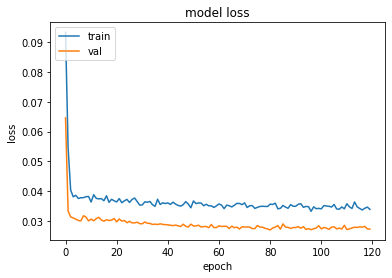

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.plot(history.history['mean_absolute_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
ypred=model.predict(X_test_final)

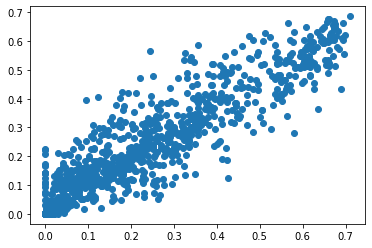

In [33]:
plt.scatter(y_test,ypred)

In [34]:
weather_data_graph=weather_data.tail(y_test.shape[0])

In [35]:
weather_data_graph['predicted']=ypred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Scatter(x=weather_data_graph.reset_index()['time_idx'], y=weather_data_graph.reset_index()['power_normed'],name='Actual generated solar power'),row=1,col=1
)
fig.add_trace(
    go.Scatter(x=weather_data_graph.reset_index()['time_idx'], y=weather_data_graph.reset_index()['predicted'],name='Predicted generated solar power by MLP with RMSE'),row=1,col=1
)


In [37]:
def lstm_data_transform(x_data, y_data, num_steps=5):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(weather_input,solpow, test_size=0.01, random_state=42,shuffle=False)

In [39]:
rf_all_features = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=5)
rf_all_features.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=1000, random_state=1)

In [40]:
rfc = RandomForestRegressor(random_state=1, n_estimators=100, max_depth=3)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	18
Rejected: 	26
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	18
Rejected: 	26
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	18
Rejected: 	26
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	18
Rejected: 	26
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	15
Rejected: 	28
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	15
Rejected: 	28
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	15
Rejected: 	28
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	15
Rejected: 	28
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	13
Reject

BorutaPy(estimator=RandomForestRegressor(max_depth=3, n_estimators=176,
                                         random_state=RandomState(MT19937) at 0x7F4AEF5908D0),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F4AEF5908D0, verbose=2)

In [41]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [42]:
X_important_train.shape[1]

9

In [43]:
n_inputs=X_important_train.shape[1]

In [44]:
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
#n_bottleneck = round(float(n_inputs) / 2.0)
n_bottleneck = 5
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [45]:
# output layer
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [46]:
history = model.fit(X_important_train, X_important_train, epochs=50, batch_size=16, verbose=2)

Epoch 1/50
389/389 - 5s - loss: 0.1183 - 5s/epoch - 12ms/step
Epoch 2/50
389/389 - 3s - loss: 0.0186 - 3s/epoch - 6ms/step
Epoch 3/50
389/389 - 2s - loss: 0.0146 - 2s/epoch - 4ms/step
Epoch 4/50
389/389 - 2s - loss: 0.0122 - 2s/epoch - 4ms/step
Epoch 5/50
389/389 - 2s - loss: 0.0111 - 2s/epoch - 4ms/step
Epoch 6/50
389/389 - 2s - loss: 0.0099 - 2s/epoch - 4ms/step
Epoch 7/50
389/389 - 2s - loss: 0.0090 - 2s/epoch - 4ms/step
Epoch 8/50
389/389 - 2s - loss: 0.0089 - 2s/epoch - 4ms/step
Epoch 9/50
389/389 - 2s - loss: 0.0083 - 2s/epoch - 4ms/step
Epoch 10/50
389/389 - 2s - loss: 0.0079 - 2s/epoch - 4ms/step
Epoch 11/50
389/389 - 2s - loss: 0.0072 - 2s/epoch - 4ms/step
Epoch 12/50
389/389 - 2s - loss: 0.0068 - 2s/epoch - 4ms/step
Epoch 13/50
389/389 - 2s - loss: 0.0066 - 2s/epoch - 4ms/step
Epoch 14/50
389/389 - 2s - loss: 0.0066 - 2s/epoch - 4ms/step
Epoch 15/50
389/389 - 2s - loss: 0.0063 - 2s/epoch - 4ms/step
Epoch 16/50
389/389 - 2s - loss: 0.0059 - 2s/epoch - 4ms/step
Epoch 17/50
389/

In [47]:
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder1.h5')

In [48]:
encoder = load_model('encoder1.h5')

# encode the train data
X_train_final = encoder.predict(X_important_train)
# encode the test data
X_test_final = encoder.predict(X_important_test)

In [49]:
X_train_final.shape

(6215, 5)

In [50]:
import numpy as np
num_steps = 3
(x_train_transformed,
 y_train_transformed) = lstm_data_transform(X_train_final, y_train, num_steps=num_steps)
assert x_train_transformed.shape[0] == y_train_transformed.shape[0]

In [51]:
from sklearn.model_selection import train_test_split
X_train_final_, X_test_final_, y_train_final, y_test_final = train_test_split(x_train_transformed,y_train_transformed, test_size=0.25, random_state=42,shuffle=False)

In [52]:
X_train_final_.shape

(4659, 3, 5)

In [53]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout

In [54]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (3,X_train_final_.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.25))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history=regressor.fit(X_train_final_, y_train_final, epochs = 100, batch_size = 32)

Epoch 1/100
146/146 [==============================] - 8s 8ms/step - loss: 0.0143
Epoch 2/100
146/146 [==============================] - 1s 8ms/step - loss: 0.0083
Epoch 3/100
146/146 [==============================] - 1s 8ms/step - loss: 0.0073
Epoch 4/100
146/146 [==============================] - 1s 8ms/step - loss: 0.0070
Epoch 5/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0066
Epoch 6/100
146/146 [==============================] - 1s 8ms/step - loss: 0.0060
Epoch 7/100
146/146 [==============================] - 1s 8ms/step - loss: 0.0058
Epoch 8/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0058
Epoch 9/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0057
Epoch 10/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0055
Epoch 11/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0055
Epoch 12/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0054
Epoch 13/100


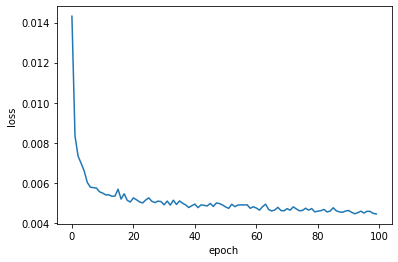

In [55]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.plot(history.history['mean_absolute_error'])
#plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [56]:
ypred_lstm=regressor.predict(X_test_final_)

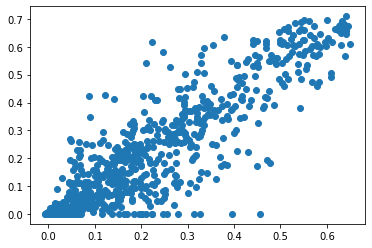

In [57]:
plt.scatter(ypred_lstm,y_test_final)

In [58]:
from keras.layers import concatenate
from keras import Model

In [79]:
def define_model():


  # first
  inputs1 = Input(shape=(3,5))
  fe1_0 = LSTM(32, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.2)(fe1_0)
  fe1_2 = LSTM(16, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=LSTM(8, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='linear')(fe1_4)



  fe2_0 = LSTM(16, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.5)(fe2_0)
  fe2_2 = LSTM(16, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(8, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='linear')(fe2_4)

  fe3_0 = LSTM(16, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.5)(fe3_0)
  fe3_2 = LSTM(8, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)
  out3_1=Dense(1, activation='linear')(fe3_4)
 
 

  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output1 = Dense(4, activation='relu')(merged3)
  output = Dense(1, activation='linear')(output1 )
  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer='adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
  return model

In [80]:
mdl = define_model()

In [81]:
history=mdl.fit(X_train_final_, y_train_final, epochs = 100, batch_size = 32)

Epoch 1/100
146/146 [==============================] - 17s 59ms/step - loss: 0.0232 - root_mean_squared_error: 0.1523
Epoch 2/100
146/146 [==============================] - 9s 59ms/step - loss: 0.0089 - root_mean_squared_error: 0.0944
Epoch 3/100
146/146 [==============================] - 8s 58ms/step - loss: 0.0072 - root_mean_squared_error: 0.0848
Epoch 4/100
146/146 [==============================] - 8s 58ms/step - loss: 0.0064 - root_mean_squared_error: 0.0800
Epoch 5/100
146/146 [==============================] - 9s 58ms/step - loss: 0.0061 - root_mean_squared_error: 0.0782
Epoch 6/100
146/146 [==============================] - 9s 59ms/step - loss: 0.0061 - root_mean_squared_error: 0.0782
Epoch 7/100
146/146 [==============================] - 8s 58ms/step - loss: 0.0057 - root_mean_squared_error: 0.0754
Epoch 8/100
146/146 [==============================] - 9s 59ms/step - loss: 0.0057 - root_mean_squared_error: 0.0754
Epoch 9/100
146/146 [==============================] - 9s 59ms/

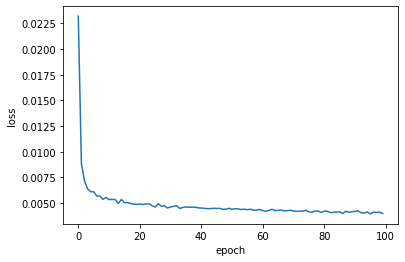

In [82]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.plot(history.history['mean_absolute_error'])
#plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [83]:
y=mdl.predict(X_test_final_)

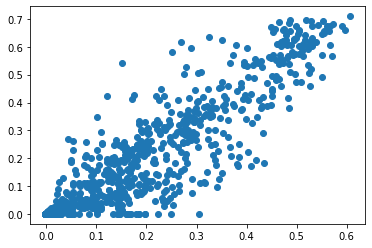

In [84]:
plt.scatter(y,y_test_final)

In [65]:
regressor1 = Sequential()
regressor1.add(LSTM(units = 64, return_sequences = True, input_shape = (3,X_train_final_.shape[2])))
regressor1.add(Dropout(0.2))

regressor1.add(LSTM(units = 32, return_sequences = True))
regressor1.add(Dropout(0.25))

regressor1.add(LSTM(units = 16, return_sequences = True))
regressor1.add(Dropout(0.25))

regressor1.add(LSTM(units = 8))
regressor1.add(Dropout(0.25))

regressor1.add(Dense(units = 1))

regressor1.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor1.fit(X_train_final_, y_train_final, epochs = 100, batch_size = 32)

Epoch 1/100
146/146 [==============================] - 6s 7ms/step - loss: 0.0166
Epoch 2/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0097
Epoch 3/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0084
Epoch 4/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0076
Epoch 5/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0072
Epoch 6/100
146/146 [==============================] - 1s 8ms/step - loss: 0.0069
Epoch 7/100
146/146 [==============================] - 1s 8ms/step - loss: 0.0069
Epoch 8/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0066
Epoch 9/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0066
Epoch 10/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0067
Epoch 11/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0064
Epoch 12/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0064
Epoch 13/100


In [66]:
regressor2 = Sequential()
regressor2.add(LSTM(units = 50, return_sequences = True, input_shape = (3,X_train_final_.shape[2])))
regressor2.add(Dropout(0.2))

regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.25))

regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.25))

regressor2.add(LSTM(units = 50))
regressor2.add(Dropout(0.25))

regressor2.add(Dense(units = 1))

regressor2.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor2.fit(X_train_final_, y_train_final, epochs = 100, batch_size = 32)

Epoch 1/100
146/146 [==============================] - 6s 8ms/step - loss: 0.0140
Epoch 2/100
146/146 [==============================] - 1s 8ms/step - loss: 0.0086
Epoch 3/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0073
Epoch 4/100
146/146 [==============================] - 1s 8ms/step - loss: 0.0068
Epoch 5/100
146/146 [==============================] - 1s 8ms/step - loss: 0.0065
Epoch 6/100
146/146 [==============================] - 1s 8ms/step - loss: 0.0063
Epoch 7/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0059
Epoch 8/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0059
Epoch 9/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0058
Epoch 10/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0059
Epoch 11/100
146/146 [==============================] - 1s 8ms/step - loss: 0.0056
Epoch 12/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0056
Epoch 13/100


In [67]:
regressor3 = Sequential()
regressor3.add(LSTM(units = 100, return_sequences = True, input_shape = (3,X_train_final_.shape[2])))
regressor3.add(Dropout(0.2))

regressor3.add(LSTM(units = 50, return_sequences = True))
regressor3.add(Dropout(0.25))

regressor3.add(LSTM(units = 25, return_sequences = True))
regressor3.add(Dropout(0.25))

regressor3.add(LSTM(units = 12))
regressor3.add(Dropout(0.25))

regressor3.add(Dense(units = 1))

regressor3.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor3.fit(X_train_final_, y_train_final, epochs = 100, batch_size = 32)

Epoch 1/100
146/146 [==============================] - 6s 8ms/step - loss: 0.0143
Epoch 2/100
146/146 [==============================] - 1s 8ms/step - loss: 0.0088
Epoch 3/100
146/146 [==============================] - 1s 8ms/step - loss: 0.0076
Epoch 4/100
146/146 [==============================] - 1s 8ms/step - loss: 0.0071
Epoch 5/100
146/146 [==============================] - 1s 8ms/step - loss: 0.0068
Epoch 6/100
146/146 [==============================] - 1s 8ms/step - loss: 0.0066
Epoch 7/100
146/146 [==============================] - 1s 8ms/step - loss: 0.0062
Epoch 8/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0062
Epoch 9/100
146/146 [==============================] - 1s 8ms/step - loss: 0.0062
Epoch 10/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0061
Epoch 11/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0059
Epoch 12/100
146/146 [==============================] - 1s 8ms/step - loss: 0.0059
Epoch 13/100


In [68]:
y1=regressor1.predict(X_test_final_)
y2=regressor2.predict(X_test_final_)
y3=regressor3.predict(X_test_final_)

In [69]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [70]:
rmse_1 = sqrt(mean_squared_error(y1,y_test_final))
rmse_2 = sqrt(mean_squared_error(y2,y_test_final))
rmse_3 = sqrt(mean_squared_error(y3,y_test_final))

In [71]:
y=(y1+1.2*y2+1.5*y3)/3

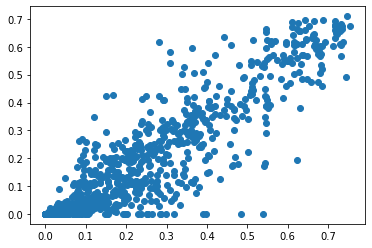

In [72]:
plt.scatter(y,y_test_final)

In [ ]:
rmse=sqrt(mean_squared_error(y,y_test_final))

In [ ]:
print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse)